In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from re import sub
from decimal import Decimal

## Load Data

In [2]:
seattle_cal = pd.read_csv('seattle/calendar.csv')
seattle_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
seattle_lis = pd.read_csv('seattle/listings.csv')
seattle_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
seattle_lis.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
seattle_rev = pd.read_csv('seattle/reviews.csv')
seattle_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Section 1: Business Understanding
If I think in customers' shoes, I would be interested in the following questions
### Question 1: How is the price spatially distributed?
### Question 2: How does the price fluctuate by time?
### Question 3: Which areas have the highest price change in a year?

## Section 2: Data Understanding

In [6]:
seattle_cal.shape[0]

1393570

In [7]:
seattle_lis.shape[0]

3818

In [8]:
seattle_rev.shape[0]

84849

host_listings_count = host_total_listings_count

In [9]:
seattle_lis[['host_listings_count', 'host_total_listings_count']][seattle_lis['host_listings_count']!=seattle_lis['host_total_listings_count']]

,host_listings_count,host_total_listings_count
1297,NaN,NaN
1419,NaN,NaN


data type

In [10]:
seattle_lis.columns[seattle_lis.isnull().mean()>0.27]

Index(['neighborhood_overview', 'notes', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'license'],
      dtype='object')

In [11]:
seattle_lis.availability_30

0       14
1       13
2        1
3        0
4       30
        ..
3813    18
3814     6
3815    29
3816    30
3817     7
Name: availability_30, Length: 3818, dtype: int64

tables are drawn on 2016-01-03

In [12]:
seattle_rev.date.max()

'2016-01-03'

In [13]:
seattle_cal.date.min()

'2016-01-04'

## Section 3: Data Preparation

drop column without enough data

In [14]:
seattle_lis.columns[seattle_lis.isnull().mean()>0.5]

Index(['square_feet', 'monthly_price', 'security_deposit', 'license'], dtype='object')

In [15]:
seattle_lis = seattle_lis.loc[:, seattle_lis.isnull().mean()<0.5]

zip code

In [16]:
seattle_lis.zipcode.unique()

array(['98119', '98109', '98107', '98117', nan, '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '99\n98122', '98121', '98102',
       '98199', '98104', '98134', '98136', '98126', '98146', '98116',
       '98177', '98118', '98108', '98133', '98106', '98178', '98125'],
      dtype=object)

In [17]:
seattle_lis.loc[seattle_lis.zipcode=='99\n98122', 'zipcode'] = '98122'

Currency to int

In [18]:
def curr2int(x):
    return Decimal(sub(r'[^\d.]', '', x))

seattle_cal.loc[seattle_cal['price'].notna(), 'price'] = seattle_cal.loc[seattle_cal['price'].notna(), 'price'].apply(curr2int).astype('float64')
seattle_lis.loc[seattle_lis['price'].notna(), 'price'] = seattle_lis.loc[seattle_lis['price'].notna(), 'price'].apply(curr2int).astype('float64')

seattle_lis.loc[seattle_lis['cleaning_fee'].notna(), 'cleaning_fee'] = seattle_lis.loc[seattle_lis['cleaning_fee'].notna(), 'cleaning_fee'].apply(curr2int).astype('float64')
seattle_lis.loc[seattle_lis['extra_people'].notna(), 'extra_people'] = seattle_lis.loc[seattle_lis['extra_people'].notna(), 'extra_people'].apply(curr2int).astype('float64')

percentage to float

In [19]:
def percentage2float(x):
    return float(x[:-1])/100

seattle_lis.loc[seattle_lis['host_response_rate'].notna(), 'host_response_rate'] = \
    seattle_lis.loc[seattle_lis['host_response_rate'].notna(), 'host_response_rate'].apply(percentage2float).astype('float64')

In [20]:
seattle_lis['host_response_rate']

0       0.96
1       0.98
2       0.67
3        NaN
4        1.0
        ... 
3813    0.99
3814     1.0
3815     NaN
3816     1.0
3817     1.0
Name: host_response_rate, Length: 3818, dtype: object

host_since to "hostship": how long they host

In [21]:
seattle_lis.host_since

0       2011-08-11
1       2013-02-21
2       2014-06-12
3       2013-11-06
4       2011-11-29
           ...    
3813    2015-04-13
3814    2015-10-14
3815    2015-12-30
3816    2015-01-03
3817    2014-04-25
Name: host_since, Length: 3818, dtype: object

In [22]:
def timediff(x):
    time1 = datetime.strptime(x, "%Y-%m-%d")
    time2 = datetime.strptime("2016-01-03", "%Y-%m-%d")
    time_diff = time2 - time1
    return time_diff.days

seattle_lis['hostship'] = seattle_lis['host_since'].apply(lambda x: timediff(x) if pd.notnull(x) else x)

In [23]:
seattle_lis['hostship']

0       1606.0
1       1046.0
2        570.0
3        788.0
4       1496.0
         ...  
3813     265.0
3814      81.0
3815       4.0
3816     365.0
3817     618.0
Name: hostship, Length: 3818, dtype: float64

imput

In [24]:
numerical = ['hostship', 'host_response_rate', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'cleaning_fee',\
    'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90',\
    'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',\
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
categorical = ['host_response_time', 'host_is_superhost', 'is_location_exact', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'room_type', 'bed_type', \
    'has_availability', 'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', \
    'require_guest_phone_verification']

In [25]:
seattle_lis[numerical].select_dtypes('object')

,host_response_rate,cleaning_fee
0,0.96,NaN
1,0.98,40.0
2,0.67,300.0
3,NaN,NaN
4,1.0,125.0
...,...,...
3813,0.99,230.0
3814,1.0,50.0
3815,NaN,35.0
3816,1.0,45.0


In [26]:
seattle_lis[numerical].apply(lambda col: col.fillna(col.mean()), axis=0)
seattle_lis[categorical].apply(lambda col: col.fillna(col.mode()), axis=0)

,host_response_time,host_is_superhost,is_location_exact,host_has_profile_pic,host_identity_verified,property_type,room_type,bed_type,has_availability,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,within a few hours,f,t,t,t,Apartment,Entire home/apt,Real Bed,t,f,f,moderate,f,f
1,within an hour,t,t,t,t,Apartment,Entire home/apt,Real Bed,t,f,f,strict,t,t
2,within a few hours,f,t,t,t,House,Entire home/apt,Real Bed,t,f,f,strict,f,f
3,NaN,f,t,t,t,Apartment,Entire home/apt,Real Bed,t,f,f,flexible,f,f
4,within an hour,f,t,t,t,House,Entire home/apt,Real Bed,t,f,f,strict,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,within a few hours,f,t,t,t,House,Entire home/apt,Real Bed,t,f,f,strict,f,f
3814,within an hour,f,t,t,t,Apartment,Entire home/apt,Real Bed,t,f,f,moderate,f,f
3815,NaN,f,f,t,f,House,Entire home/apt,Real Bed,t,f,f,moderate,f,f
3816,within an hour,f,f,t,t,Condominium,Entire home/apt,Real Bed,t,f,f,moderate,f,f


In [27]:
seattle_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [28]:
seattle_rev.isna().mean()

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000212
dtype: float64

In [29]:
seattle_rev.comments

0        Cute and cozy place. Perfect location to every...
1        Kelly has a great room in a very central locat...
2        Very spacious apartment, and in a great neighb...
3        Close to Seattle Center and all it has to offe...
4        Kelly was a great host and very accommodating ...
                               ...                        
84844    The description and pictures of the apartment ...
84845    We had an excellent stay. It was clean and com...
84846    Gran ubicación, cerca de todo lo atractivo del...
84847    Very good apartement, clean and well sized. Si...
84848    Breanne was a great host. Check in was easy, s...
Name: comments, Length: 84849, dtype: object

In [30]:
seattle_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [31]:
seattle_cal.available=seattle_cal.available.map({'t':1, 'f':0})

In [32]:
seattle_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [33]:
seattle_cal.isna().mean()

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [34]:
seattle_cal[seattle_cal.price.isna()].date.min()

'2016-01-04'

In [35]:
seattle_cal[seattle_cal.price.notna()].date.max()

'2017-01-02'

In [36]:
seattle_cal_with_price = seattle_cal[seattle_cal.price.notna()]
seattle_cal_with_price.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
9,241032,2016-01-13,1,85.0
10,241032,2016-01-14,1,85.0
14,241032,2016-01-18,1,85.0


In [37]:
seattle_cal_with_price.available.unique()

array([1])

In [38]:
seattle_cal_without_price = seattle_cal.loc[seattle_cal.price.isna()].sort_values('date')
seattle_cal_without_price.head()

,listing_id,date,available,price
1073100,8267620,2016-01-04,0,NaN
542755,935671,2016-01-04,0,NaN
1220560,6445769,2016-01-04,0,NaN
542025,9939025,2016-01-04,0,NaN
541295,7332364,2016-01-04,0,NaN


In [39]:
seattle_cal_without_price.available.unique()

array([0])

In [40]:
temp = seattle_rev.groupby(['reviewer_id', 'listing_id']).size()
temp[temp>1]

reviewer_id  listing_id
12561        496074        2
13139        443580        2
16549        132160        2
16613        86185         3
             613020        2
                          ..
47003083     3883137       2
47579596     7350992       2
47679162     7988337       2
48895136     7483750       2
49136419     8409941       2
Length: 1087, dtype: int64

In [41]:
seattle_lis.columns[seattle_lis.isna().any()]

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'weekly_price', 'cleaning_fee', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'hostship'],
      dtype='object')

## Section 4: Evaluation

### Pricing

### review score rating

price - time, geometry

In [47]:
seattle_cal[seattle_cal.available==1]

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
9,241032,2016-01-13,1,85.0
10,241032,2016-01-14,1,85.0
14,241032,2016-01-18,1,85.0
...,...,...,...,...
1393207,10208623,2016-01-06,1,87.0
1393208,10208623,2016-01-07,1,87.0
1393211,10208623,2016-01-10,1,87.0
1393212,10208623,2016-01-11,1,87.0


In [58]:
df_price = pd.merge(seattle_cal[seattle_cal.available==1], seattle_lis, left_on='listing_id', right_on='id', how='left')[['listing_id', 'zipcode', 'date', 'price_x', 'price_y']]

In [59]:
df_price['price_diff']=df_price.price_x - df_price.price_y

In [62]:
(df_price.price_diff>0).mean()

0.21574204262622762

In [63]:
(df_price.price_diff<0).mean()

0.05397938241405951

In [68]:
df_price

,listing_id,zipcode,date,price_x,price_y,price_diff
0,241032,98119,2016-01-04,85.0,85.0,0.0
1,241032,98119,2016-01-05,85.0,85.0,0.0
2,241032,98119,2016-01-13,85.0,85.0,0.0
3,241032,98119,2016-01-14,85.0,85.0,0.0
4,241032,98119,2016-01-18,85.0,85.0,0.0
...,...,...,...,...,...,...
934537,10208623,98109,2016-01-06,87.0,87.0,0.0
934538,10208623,98109,2016-01-07,87.0,87.0,0.0
934539,10208623,98109,2016-01-10,87.0,87.0,0.0
934540,10208623,98109,2016-01-11,87.0,87.0,0.0


/Users/peng.chen/.pyenv/versions/3.9.5/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_x'>

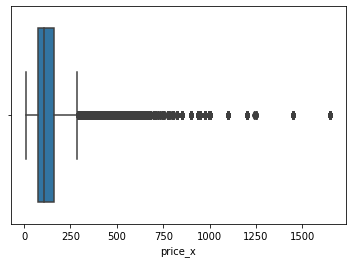

In [88]:
sns.boxplot(df_price['price_x'])

<AxesSubplot:xlabel='date', ylabel='zipcode'>

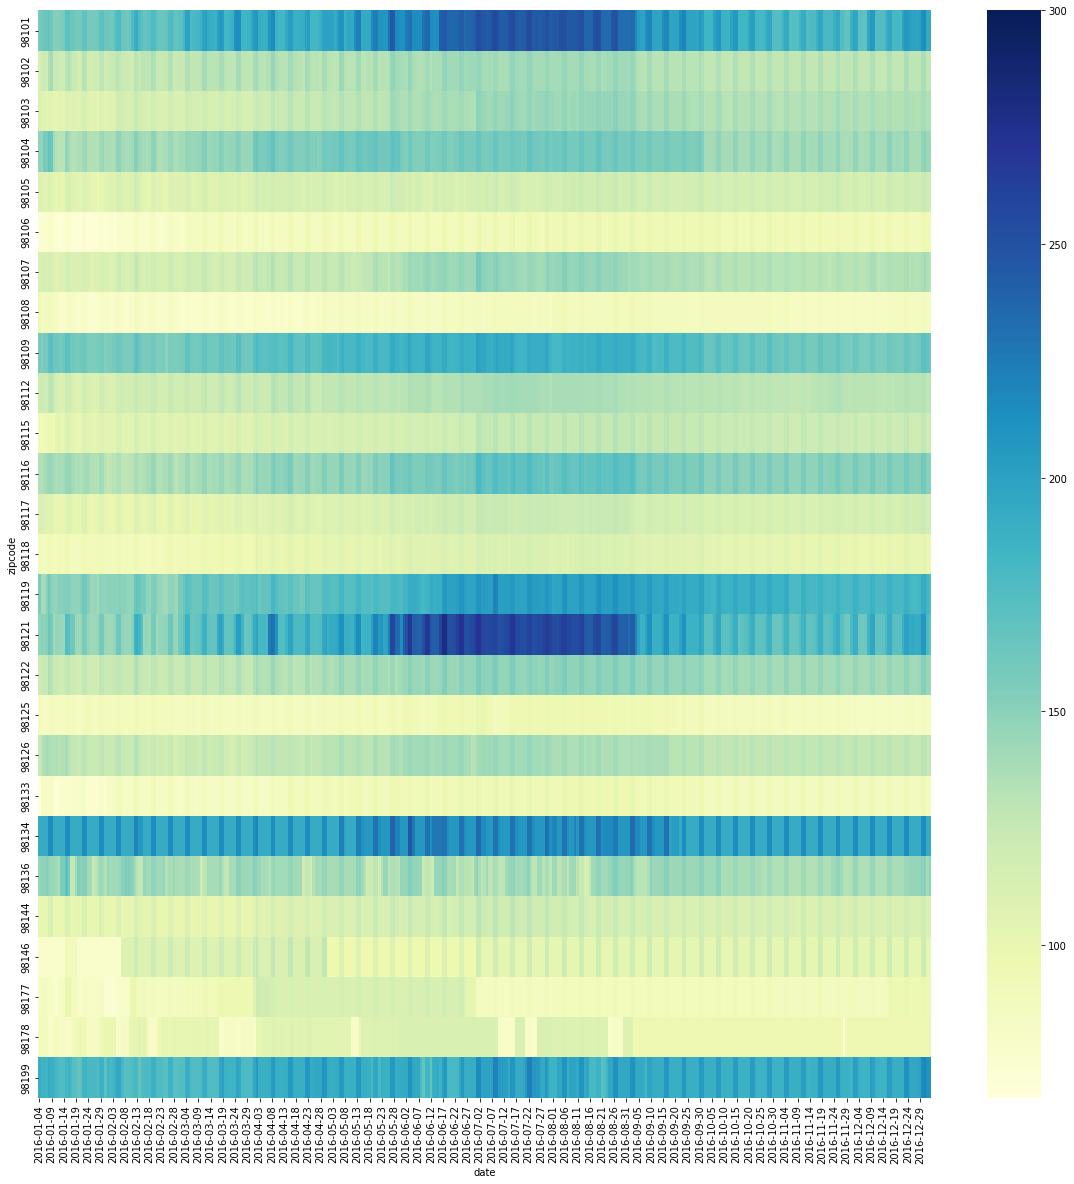

In [94]:
_, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_price[['date', 'zipcode', 'price_x']].groupby(['date', 'zipcode']).mean().reset_index().pivot('zipcode', 'date', 'price_x'), vmax=300, cmap="YlGnBu", ax=ax)

price difference - time and location

/Users/peng.chen/.pyenv/versions/3.9.5/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_diff'>

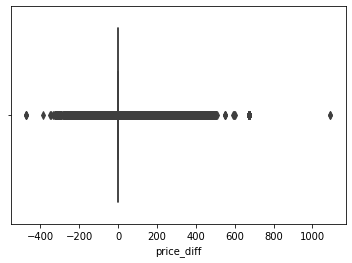

In [96]:
sns.boxplot(df_price['price_diff'])

<AxesSubplot:xlabel='date', ylabel='zipcode'>

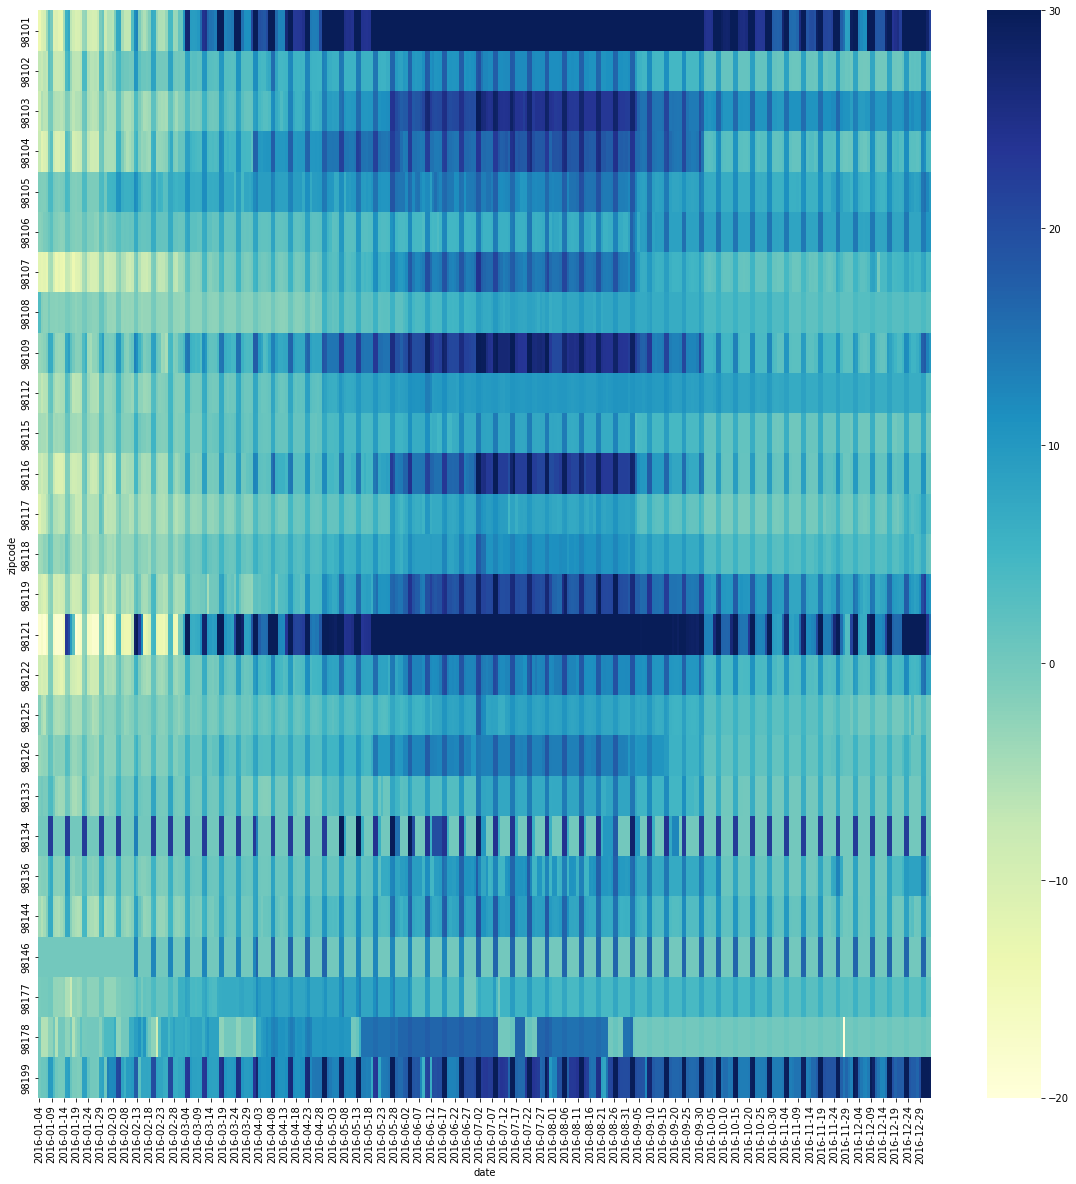

In [97]:
_, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_price[['date', 'zipcode', 'price_diff']].groupby(['date', 'zipcode']).mean().reset_index().pivot('zipcode', 'date', 'price_diff'), vmax=30, vmin=-20, cmap="YlGnBu", ax=ax)

price - location

In [ ]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

In [105]:
df_geo_price = df_price[['zipcode', 'price_x']].groupby(['zipcode']).mean().reset_index()

In [106]:
df_geo_price

,zipcode,price_x
0,98101,201.579881
1,98102,133.495981
2,98103,131.372552
3,98104,150.839620
4,98105,114.813577
5,98106,89.612233
6,98107,131.984608
7,98108,84.353926
8,98109,172.418371
9,98112,129.414610


In [ ]:
zip_code_boundary=gpd.read_file('Zip_Codes.geojson')

zip_code_boundary_price=gpd.GeoDataFrame(pd.merge(df_geo_price, zip_code_boundary, left_on='zipcode', right_on='ZIPCODE'), geometry=zip_code_boundary.geometry)

this part is run in another notebook, I paste the result here
![geo_price](images/geo_price.png)

In [111]:
df_price[['zipcode', 'price_x']].groupby(['zipcode']).std().reset_index()['price_x'].to_list()

[102.01037560762987,
 98.07579272381494,
 101.64282613612869,
 72.98834244365558,
 100.36888897174101,
 45.963888405927705,
 91.14919105250588,
 57.81664662220285,
 136.75047469033902,
 88.63926926895999,
 107.13868181902973,
 97.029330519014,
 78.56653614138212,
 76.3507153857444,
 161.7082089779834,
 124.36624374458748,
 92.76746714021017,
 54.309706410934126,
 91.65848540555758,
 42.34097904409249,
 70.64069593501348,
 93.0668470084405,
 67.85153951159216,
 69.2761332493791,
 50.233047943175734,
 52.05546377093233,
 176.15865099587188]